In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("hiring.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [3]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [4]:
df['experience'] = df['experience'].fillna('missing')

In [5]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(np.round(df['test_score(out of 10)']).mean())

In [6]:
df.isnull().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [7]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,missing,8.0,9,50000
1,missing,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


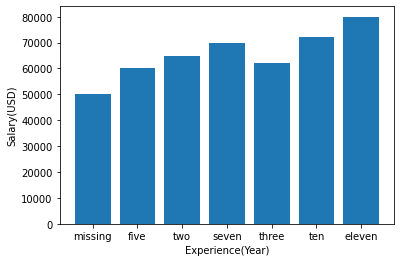

In [8]:
plt.bar(df['experience'], df['salary($)'])
plt.xlabel('Experience(Year)')
plt.ylabel('Salary(USD)')
plt.show()

In [9]:
# round the value bcoz test score will be an whole number 
df['test_score(out of 10)'] = df['test_score(out of 10)'].astype(int)

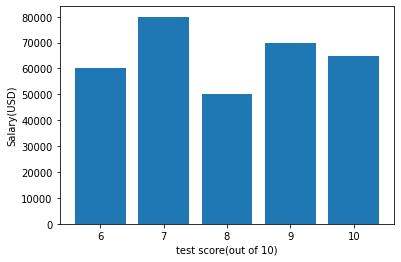

In [10]:
plt.bar(df['test_score(out of 10)'], df['salary($)'])
plt.xlabel('test score(out of 10)')
plt.ylabel('Salary(USD)')
plt.show()

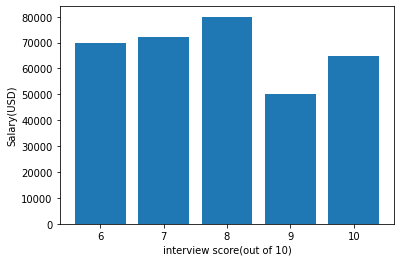

In [11]:
plt.bar(df['interview_score(out of 10)'], df['salary($)'])
plt.xlabel('interview score(out of 10)')
plt.ylabel('Salary(USD)')
plt.show()

In [12]:
df['experience'].unique()

array(['missing', 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [13]:
df['experience'] = df['experience'].replace(['missing', 'two', 'three', 'five', 'seven', 'ten', 'eleven'], [0,1,2,3,4,5,6])

In [14]:
X = df.drop(['salary($)'], axis=1)
y = df['salary($)']

In [15]:
Lreg = LinearRegression()
Lreg.fit(X,y)

LinearRegression()

In [16]:
Lreg.predict([[1, 9, 6]])

array([53211.82671718])

In [17]:
Lreg.predict([[7, 10, 10]])

array([97815.26931313])

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(min_samples_leaf=2, max_samples=8)
rfc.fit(X,y)

RandomForestRegressor(max_samples=8, min_samples_leaf=2)

In [35]:
rfc.predict([[1, 9, 6]])

array([57760.5])

In [36]:
y_pred = rfc.predict([[7, 10, 10]])
print(y_pred)

[71129.16666667]
